# Задание #1
1. Модель Поттса с q=4 компонентами. Периодичные гран. условия.
3. Реализация алгоритм Вольфа
4. Построить E(N), M(N)

In [160]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [118]:
T = 0.5    # temperature
L = 10     # size
q = 4      # components
J = 1      # interaction energy
K = J/T  

In [119]:
def gen_state(L, q):
# generate random start state with lenght L*L and q components
    np.random.seed(1234)
    state = np.random.randint(0, q, L*L).reshape(L,L)
    return state

#################################################################

def kron(i,j):
# Kroneker symbol
    if i==j:
        return 1
    else:
        return 0

#################################################################    
    
def to_Q(Q,i,j):
# add spin to Queue
    return Q.append((i,j))

def get_Q(Q):
# get spin from Queue
    i, j = Q.pop(0)
    if i==L-1: i=-1
    if j==L-1: j=-1
    if i==-L: i=0
    if j==-L: j=0
    return i,j

def visited(vstate, i, j):
# mark spin as Visited
    vstate[i,j]=True
    return vstate

def to_cluster(cluster, i,j):
# add spin to cluster
    return cluster.append((i,j))

def get_ij():
### get initial spin in Wolff Alg.
    return np.random.randint(0, L), np.random.randint(0, L)

def new_state(state, cluster):
### for Ising: 1 -> -1
    new = np.random.randint(0, q)
    for c in cluster:
        state[c[0],c[1]] = new
    return state

def create_bound():
    if np.random.uniform(0,1) < 1-np.exp(-K):
        return True
    else:
        return False
#################################################################
    
def Wolff_step(state):
# make 1 cluster turn
    Q = []
    cluster = []
    vstate = np.array([False]*L*L).reshape(L,L)
    i,j = get_ij()
    vstate[i,j]=True
    to_cluster(cluster, i,j)
    to_Q(Q,i,j)
    
    while len(Q)>0:
        i,j = get_Q(Q)
        options = [1, -1]
        for a in options:
            if vstate[i+a,j]==False:
                visited(vstate,i+a,j)
                if kron(state[i,j],state[i+a,j])==1:
                    if create_bound()==True:
                        to_cluster(cluster,i+a,j)
                        to_Q(Q,i+a,j)
            if vstate[i,j+a]==False:
                visited(vstate,i,j+a)
                if kron(state[i,j],state[i,j+a])==1:
                    if create_bound()==True:
                        to_cluster(cluster,i,j+a)
                        to_Q(Q,i,j+a)
    
    return new_state(state, cluster)

#################################################################
    
def calc_e(state):
    a = np.concatenate((state[L-1].reshape(1,L), state), axis=0)   # add last line to TOP
    pstate = np.concatenate((a, a[:,0].reshape(L+1,1)), axis=1)    # add first line to RIGHT
    e = 0
    for i in range(L):
        for j in range(L):
            e += kron(pstate[i,j], pstate[i+1,j]) # right neighbour
            e += kron(pstate[i,j], pstate[i,j+1]) # down neighbour
    return -e     # e = -J*qi*qj

def calc_m(state):
    m_vect = np.array([np.count_nonzero(state == i) for i in range(q)])
    return (max(m_vect)*q/L**2-1)/(q-1)  #Numerical revision of the ... two-dimensional 4-state Potts model (15)

In [120]:
def relax_wolff(state, L):
# make L*L steps in Wolff Alg. to relax
    for _ in range(L*L):
        state = Wolff_step(state)
    return state

In [131]:
state = gen_state(L, q)
e = [calc_e(state)]
m = [calc_m(state)]

N = 500      # Number of Relaxed Wolff's steps
for i in range(N):
    state = relax_wolff(state, L)
    e += [calc_e(state)]
    m += [calc_m(state)]

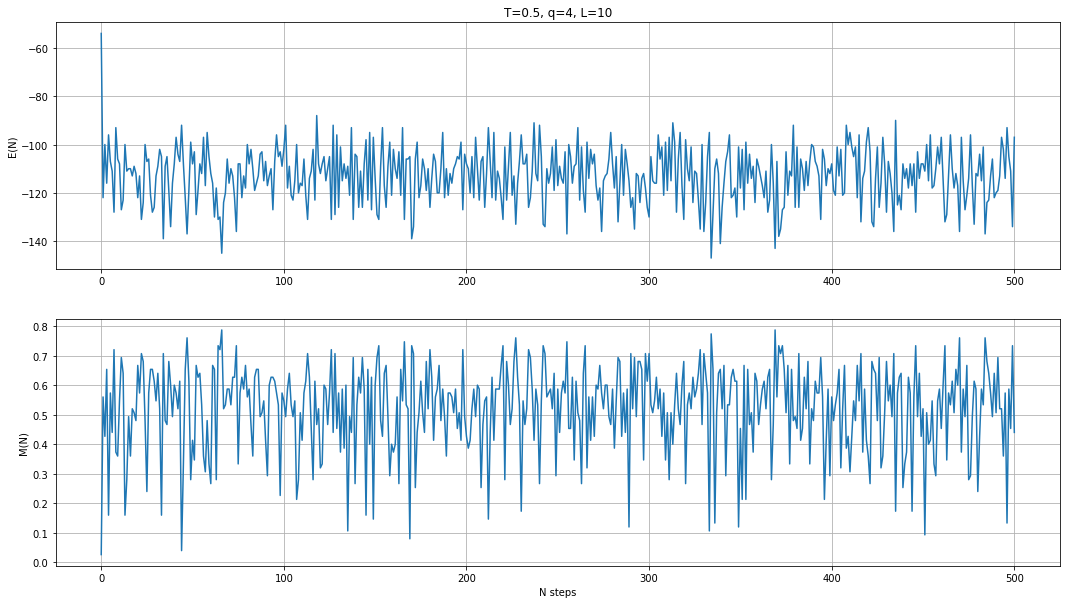

In [132]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 1, 1)
plt.plot(e, '-')
plt.title('T=0.5, q=4, L=10')
plt.ylabel('E(N)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(m, '-')
plt.xlabel('N steps')
plt.ylabel('M(N)')
plt.grid(True)

plt.show()

# Задание #2
1. Промоделировать для T=0.1:2.0 с шагом 0.1
2. Построить E(T), M(T)

In [173]:
t = np.arange(1,21)/10
state = gen_state(L, q)
N = 1000 # relaxation
E, M = [],[]         # E,M global
for T in t:
    st = time.time() # time start
    K = J/T
    e,m = [],[]      # e,m local
    for i in range(N):
        state = relax_wolff(state, L)
        e += [calc_e(state)]
        m += [calc_m(state)]
    E += [np.mean(e)]
    M += [np.mean(m)]
    print('T=',T,' Exec. time=', time.time()-st)

T= 0.1  Exec. time= 124.49571299552917
T= 0.2  Exec. time= 117.91433310508728
T= 0.3  Exec. time= 102.75068593025208
T= 0.4  Exec. time= 75.83674693107605
T= 0.5  Exec. time= 46.406710147857666
T= 0.6  Exec. time= 26.157117128372192
T= 0.7  Exec. time= 16.687446117401123
T= 0.8  Exec. time= 11.925855159759521
T= 0.9  Exec. time= 9.656702995300293
T= 1.0  Exec. time= 7.908599138259888
T= 1.1  Exec. time= 7.08263897895813
T= 1.2  Exec. time= 6.407246112823486
T= 1.3  Exec. time= 5.964214086532593
T= 1.4  Exec. time= 5.799385070800781
T= 1.5  Exec. time= 5.369638919830322
T= 1.6  Exec. time= 5.339678049087524
T= 1.7  Exec. time= 4.888218879699707
T= 1.8  Exec. time= 4.992517948150635
T= 1.9  Exec. time= 4.5772318840026855
T= 2.0  Exec. time= 4.643391132354736


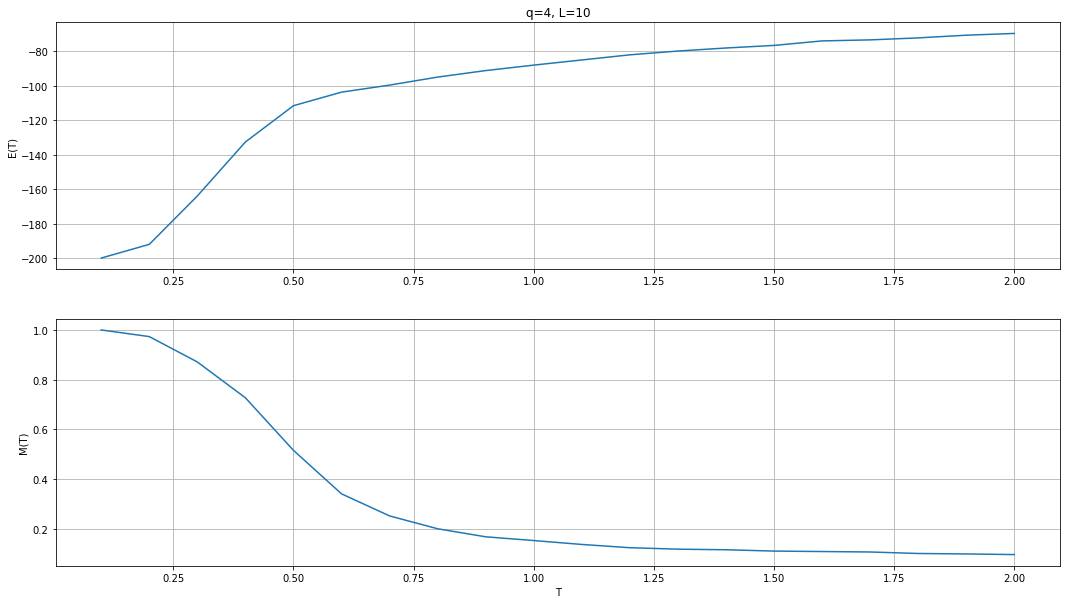

In [174]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 1, 1)
plt.plot(t,E, '-')
plt.title('q=4, L=10')
plt.ylabel('E(T)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t,M, '-')
plt.xlabel('T')
plt.ylabel('M(T)')
plt.grid(True)

plt.show()